
# Task 4 — Data Cleaning & Insight Generation from Survey Data

This notebook loads a synthetic Kaggle-style Data Science Survey (2017–2021), cleans it, encodes categorical columns, and generates insights and charts. All outputs are shown inline.



Raw shape: (1530, 12)
Cleaned shape: (1500, 26)


,respondent_id,year,country_raw,education_raw,job_role_raw,primary_language_raw,ml_tools_raw,years_experience_raw,salary_usd_raw,remote_work_raw,preferred_ide_raw,learning_platform_raw
0,100000,2019,JP,high School,Data Scientist,r,None;TensorFlow,3-5,98096.00402578905,Yes,Notepad++,Blogs
1,100001,2021,Brazil,NaN,Data Engineer,sql,NaN,5-10,117179.53386040896,No,Spyder,YouTube
2,100002,2020,United States,MS,ML Engineer,JS,LightGBM;PyTorch;XGBoost,5-10,"$79,214",Y,Spyder,Kaggle
3,100003,2020,United States,Doctorate,Data Analyst,sql,Keras;None,3-5,136699.21101529888,No,JupyterLab,Coursera
4,100004,2018,U.S.A.,Masters,data scientist,SQL,None,0,"$48,326",N,JupyterLab,Books


,respondent_id,year,country_raw,education_raw,job_role_raw,primary_language_raw,ml_tools_raw,years_experience_raw,salary_usd_raw,remote_work_raw,...,remote_work,years_experience,salary_usd,ml_tools_list,ml_tool_count,country_le,education_le,job_role_le,primary_language_le,remote_work_le
0,100000,2019,JP,high School,Data Scientist,r,None;TensorFlow,3-5,98096.00402578905,Yes,...,Yes,4.0,98096.004026,"['None', 'TensorFlow']",2,6,2,3,4,2
1,100001,2021,Brazil,NaN,Data Engineer,sql,NaN,5-10,117179.53386040896,No,...,No,7.5,117179.533860,[],0,2,6,2,5,1
2,100002,2020,United States,MS,ML Engineer,JS,LightGBM;PyTorch;XGBoost,5-10,"$79,214",Y,...,Yes,7.5,79214.000000,"['LightGBM', 'PyTorch', 'XGBoost']",3,9,3,4,2,2
3,100003,2020,United States,Doctorate,Data Analyst,sql,Keras;None,3-5,136699.21101529888,No,...,No,4.0,136699.211015,"['Keras', 'None']",2,9,1,1,5,1
4,100004,2018,U.S.A.,Masters,data scientist,SQL,None,0,"$48,326",N,...,No,0.0,48326.000000,[],0,9,3,3,5,1



Missing values in RAW:
salary_usd_raw           96
primary_language_raw     33
education_raw            26
ml_tools_raw             26
respondent_id             0
year                      0
country_raw               0
job_role_raw              0
years_experience_raw      0
remote_work_raw           0
preferred_ide_raw         0
learning_platform_raw     0
dtype: int64

Missing values in CLEAN:
salary_usd_raw          93
primary_language_raw    32
education_raw           26
ml_tools_raw            26
respondent_id            0
primary_language         0
primary_language_le      0
job_role_le              0
education_le             0
country_le               0
ml_tool_count            0
ml_tools_list            0
salary_usd               0
years_experience         0
remote_work              0
dtype: int64

Duplicate rows in RAW (subset): 30

Salary stats (CLEAN):
count      1500.000000
mean     103225.705442
std       82652.800615
min        9590.921500
25%       63235.063652
50%      

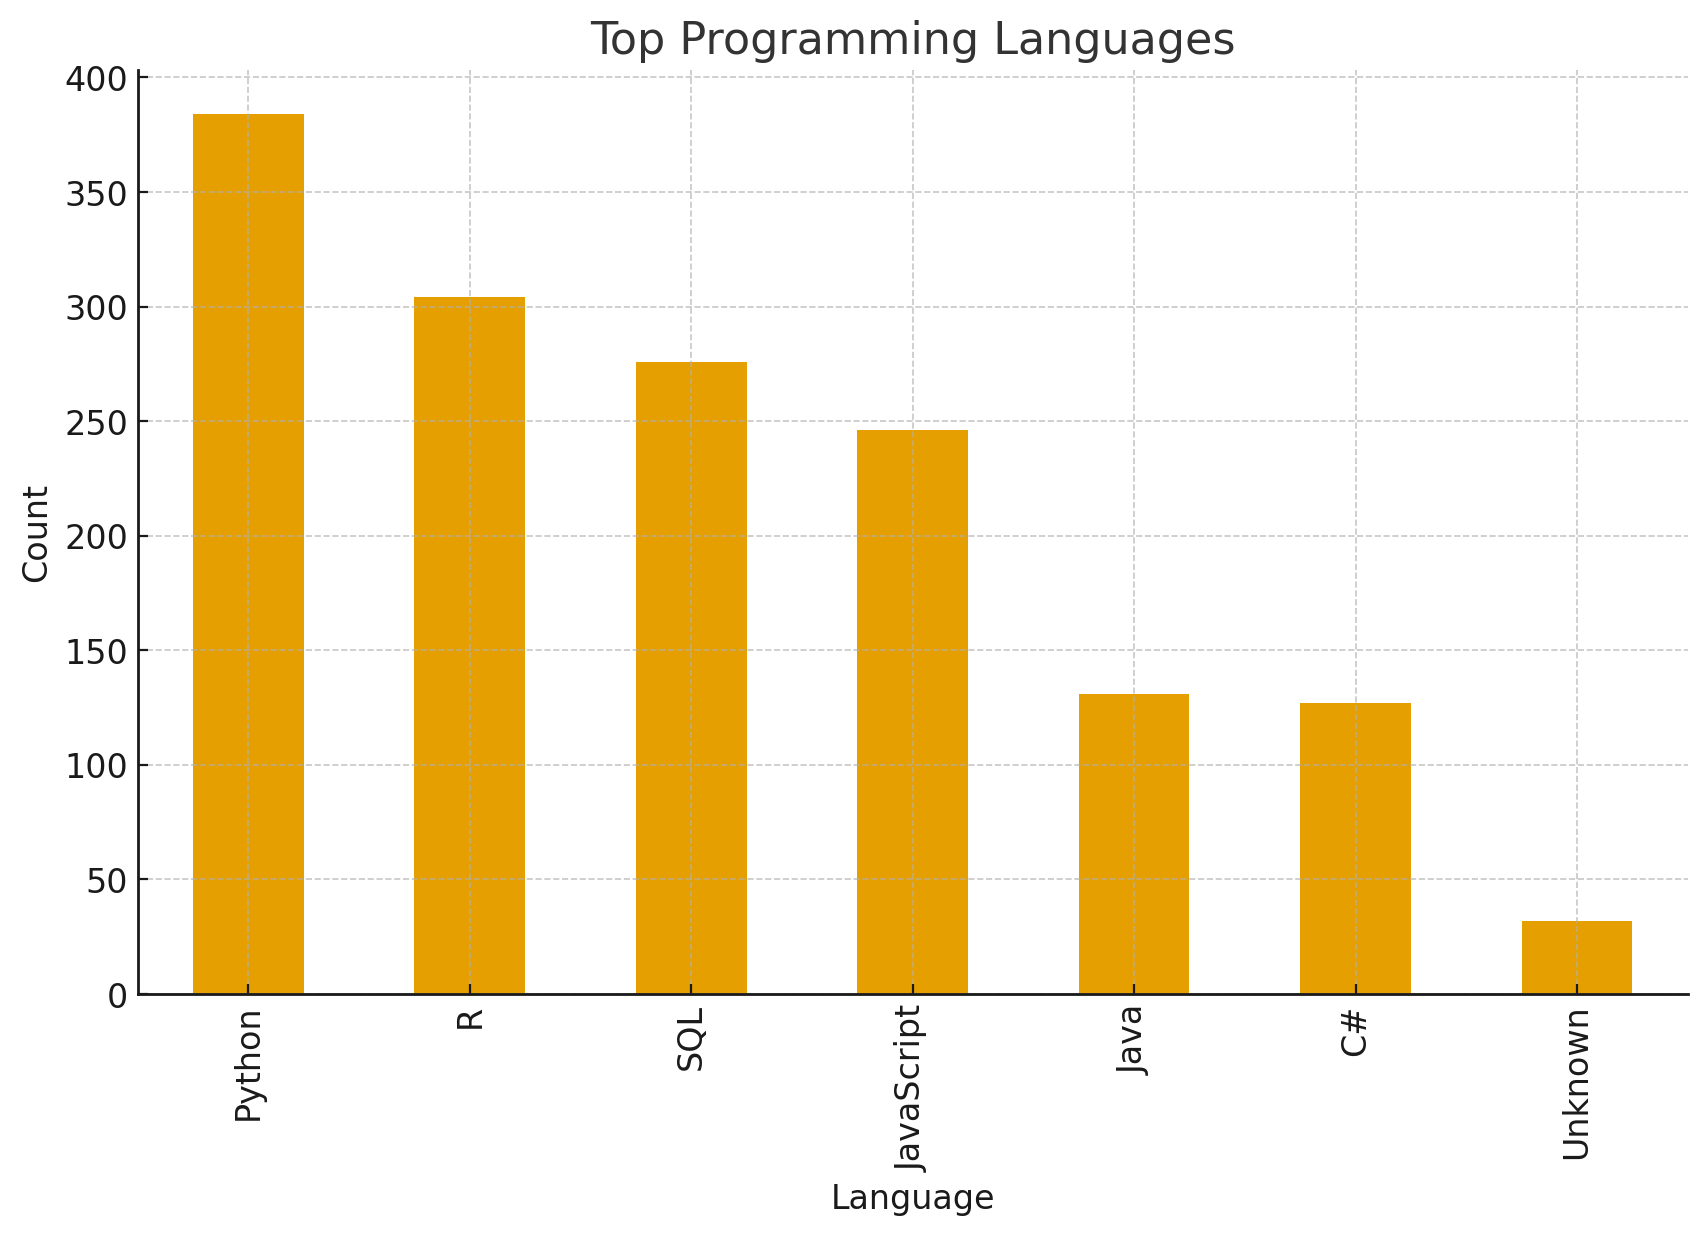

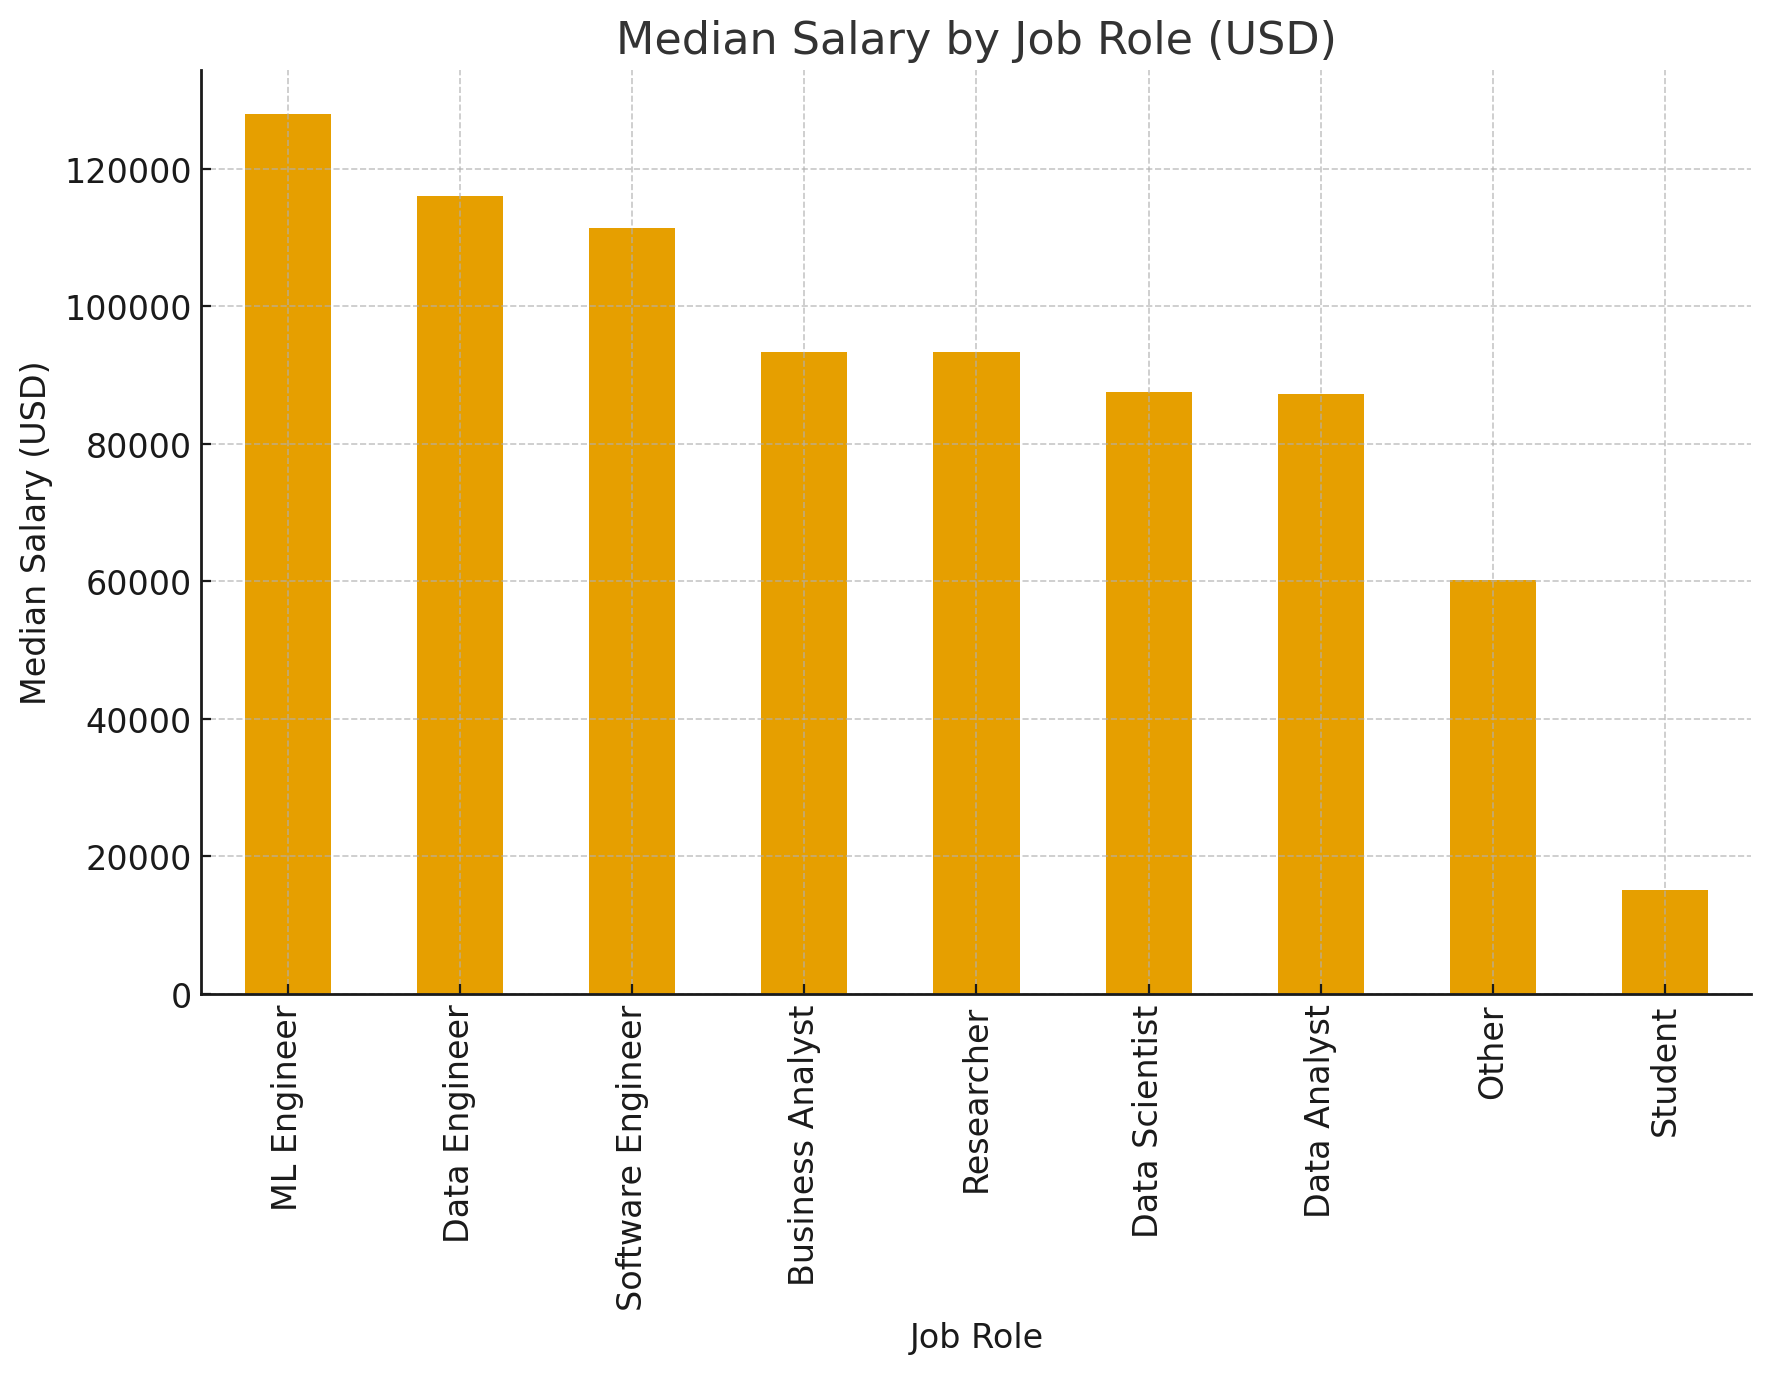

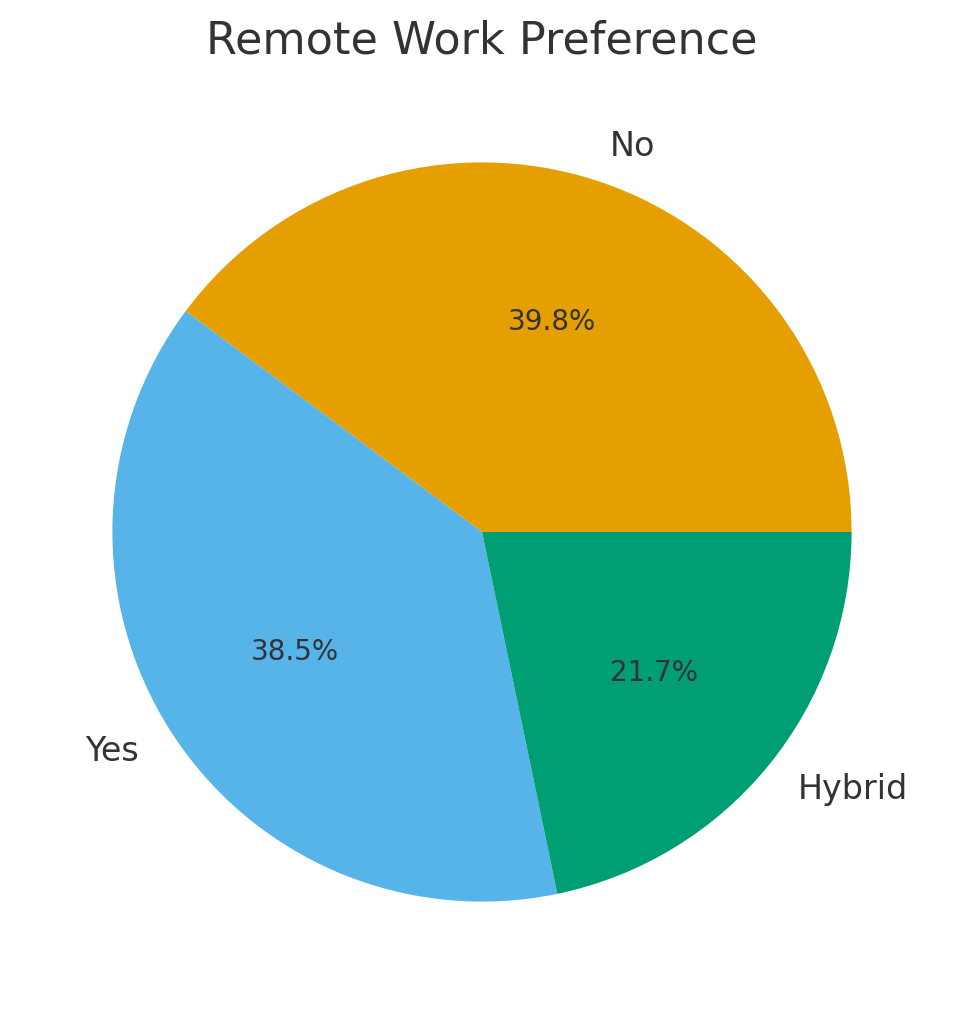

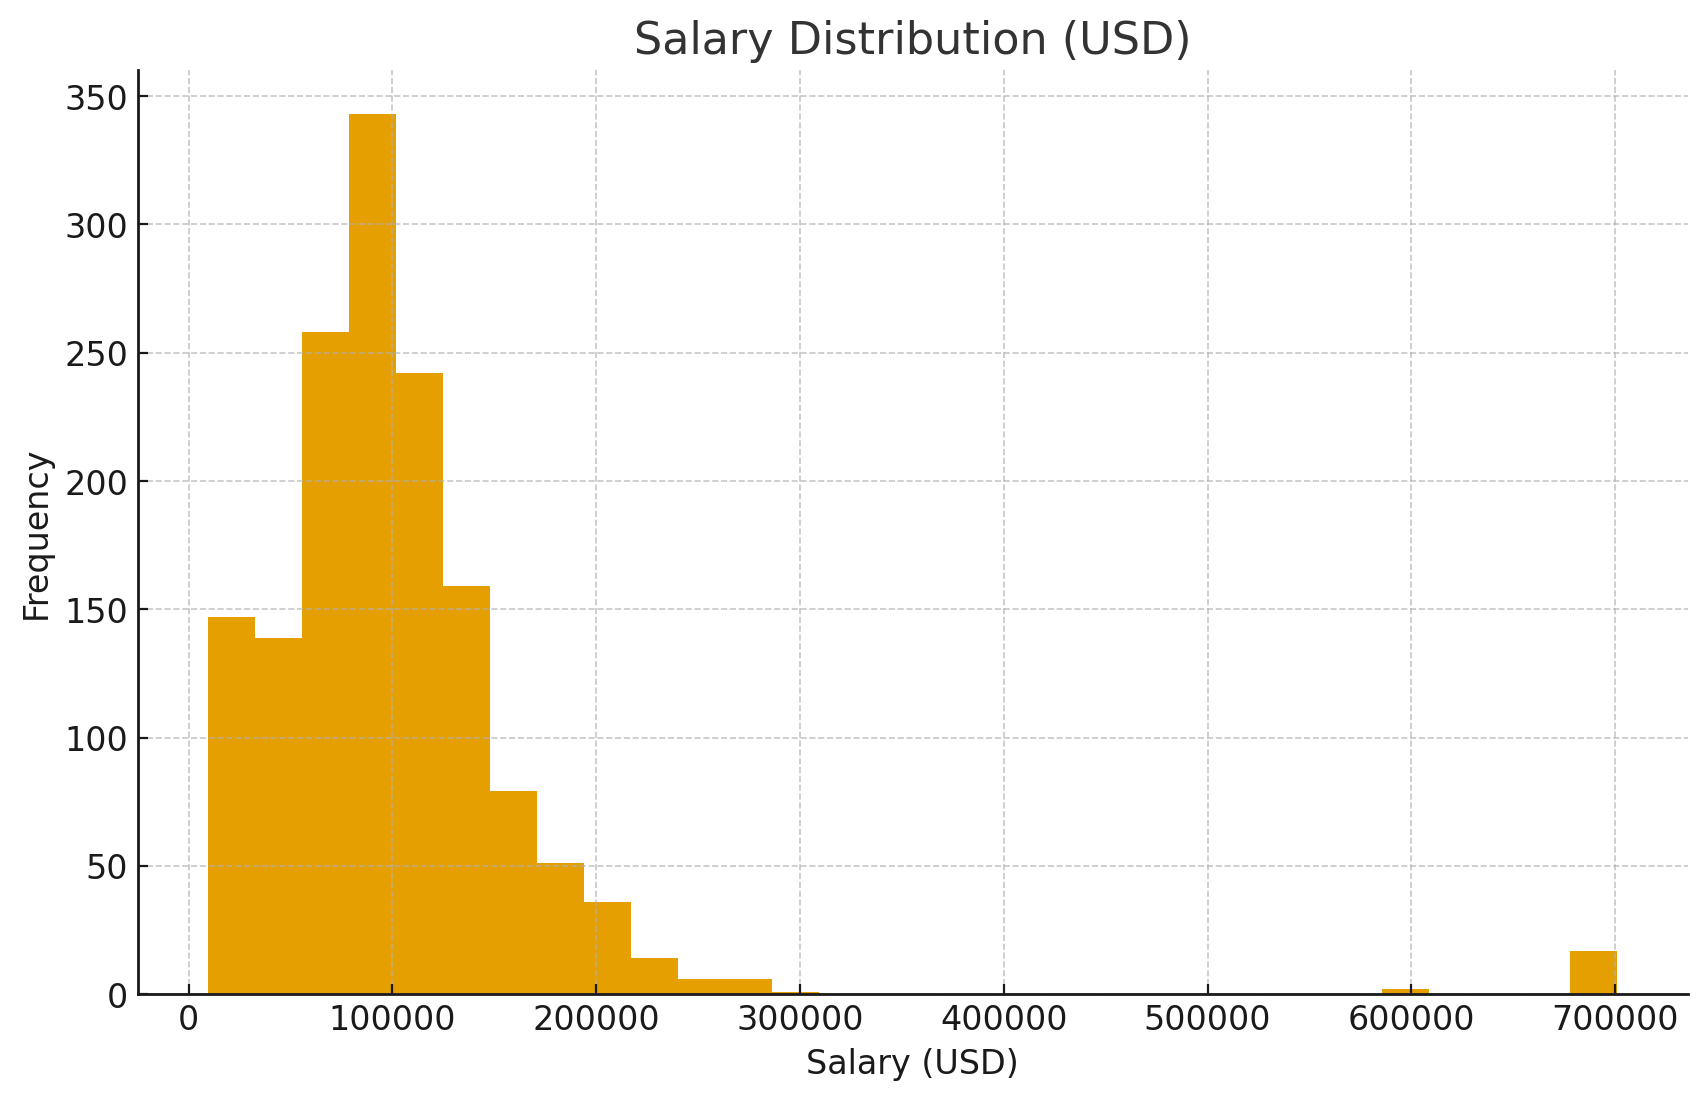

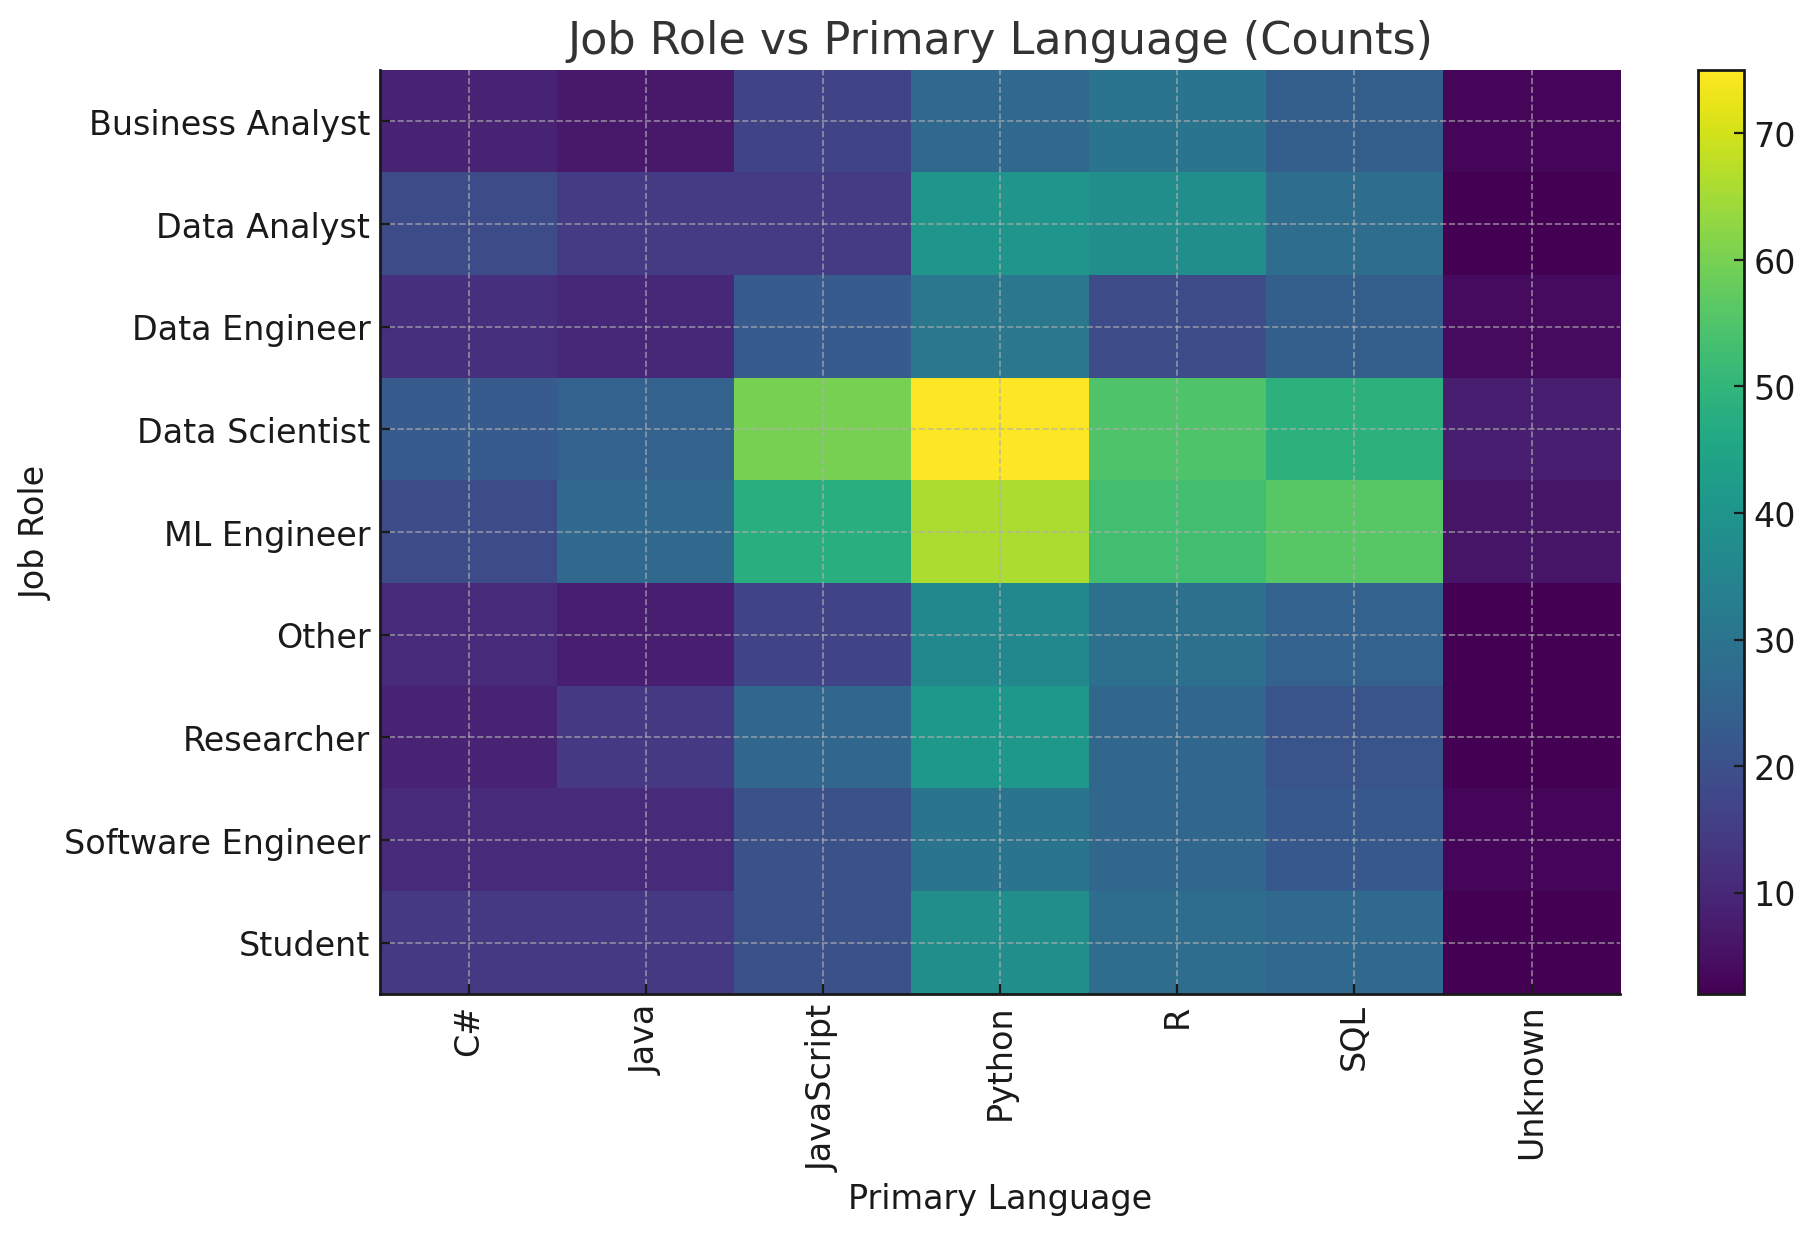


Label-encoded preview:


,country,country_le,education,education_le,job_role,job_role_le
0,Japan,6,High School or Less,2,Data Scientist,3
1,Brazil,2,Unknown,6,Data Engineer,2
2,United States,9,Master's,3,ML Engineer,4
3,United States,9,Doctorate,1,Data Analyst,1
4,United States,9,Master's,3,Data Scientist,3



Top 5 Insights:
1) Most common primary language: Python (top 10 shown above).
2) Highest median salary role: ML Engineer (~$127994).
3) Share preferring remote work (Yes): 38.5%.
4) Most frequently cited ML tool: LightGBM.
5) Experience vs Salary correlation (approx): 0.02.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
raw = pd.read_csv("/mnt/data/survey_raw.csv")
clean = pd.read_csv("/mnt/data/cleaned_survey.csv")

print("Raw shape:", raw.shape)
print("Cleaned shape:", clean.shape)

# Preview head
display(raw.head())
display(clean.head())

# --- Missing values overview ---
print("\nMissing values in RAW:")
print(raw.isna().sum().sort_values(ascending=False).head(15))

print("\nMissing values in CLEAN:")
print(clean.isna().sum().sort_values(ascending=False).head(15))

# --- Duplicates overview ---
raw_dupes = raw.duplicated(subset=["respondent_id","year","job_role_raw","primary_language_raw"]).sum()
print("\nDuplicate rows in RAW (subset):", raw_dupes)

# --- Quick stats ---
print("\nSalary stats (CLEAN):")
print(clean['salary_usd'].describe())

# --- Visualizations ---
# 1. Top languages
lang_counts = clean['primary_language'].value_counts().head(10)
plt.figure()
lang_counts.plot(kind="bar")
plt.title("Top Programming Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

# 2. Median salary by role
median_salary_by_role = clean.groupby('job_role')['salary_usd'].median().sort_values(ascending=False)
plt.figure()
median_salary_by_role.plot(kind="bar")
plt.title("Median Salary by Job Role (USD)")
plt.xlabel("Job Role")
plt.ylabel("Median Salary (USD)")
plt.show()

# 3. Remote work pie
remote_counts = clean['remote_work'].value_counts()
plt.figure()
plt.pie(remote_counts.values, labels=remote_counts.index, autopct="%1.1f%%")
plt.title("Remote Work Preference")
plt.show()

# 4. Salary histogram
plt.figure()
plt.hist(clean['salary_usd'].dropna(), bins=30)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

# 5. Heatmap: job role vs primary language
crosstab = pd.crosstab(clean['job_role'], clean['primary_language'])
plt.figure()
plt.imshow(crosstab.values, aspect="auto")
plt.title("Job Role vs Primary Language (Counts)")
plt.xlabel("Primary Language")
plt.ylabel("Job Role")
plt.xticks(ticks=np.arange(len(crosstab.columns)), labels=crosstab.columns, rotation=90)
plt.yticks(ticks=np.arange(len(crosstab.index)), labels=crosstab.index)
plt.colorbar()
plt.show()

# --- Encodings demo ---
for col in ['country','education','job_role','primary_language','remote_work']:
    clean[col] = clean[col].astype('category')
    clean[col + '_le'] = clean[col].cat.codes

print("\nLabel-encoded preview:")
display(clean[['country','country_le','education','education_le','job_role','job_role_le']].head())

# --- Top 5 insights (printed) ---
insights = []

top_lang = lang_counts.idxmax()
insights.append(f"Most common primary language: {top_lang} (top 10 shown above).")

top_role = median_salary_by_role.index[0]
top_role_med = int(median_salary_by_role.iloc[0])
insights.append(f"Highest median salary role: {top_role} (~${top_role_med}).")

remote_share = (clean['remote_work'] == 'Yes').mean()
insights.append(f"Share preferring remote work (Yes): {remote_share:.1%}.")

tool_counts = clean['ml_tools_raw'].fillna('').str.split(';').explode().str.strip()
tool_counts = tool_counts[tool_counts != '']
if not tool_counts.empty:
    top_tool = tool_counts.value_counts().idxmax()
    insights.append(f"Most frequently cited ML tool: {top_tool}.")
else:
    insights.append("No ML tools reported.")

exp_corr = np.corrcoef(clean['years_experience'].fillna(clean['years_experience'].median()),
                       clean['salary_usd'].fillna(clean['salary_usd'].median()))[0,1]
insights.append(f"Experience vs Salary correlation (approx): {exp_corr:.2f}.")

print("\nTop 5 Insights:")
for i, t in enumerate(insights, 1):
    print(f"{i}) {t}")
